# Exercise 1: Detecting a signal in noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import uuid

## 1. Plots of signal plus noise

Write a function for the plots. The files were created form the command line with generate_source.

In [2]:
def plotfunction(datafile, s, f, a):
    X, Y = np.loadtxt(datafile, delimiter=' ', unpack=True)
    plt.plot(X, Y)
    plt.title(f'File {datafile} with s = {s}, f = {f}, a = {a}')
    plt.xlabel('$t$')
    plt.ylabel('$d(t)$')
    plt.show()

### Try several standard deviations

s = 1.0,
d = 0.001,
N = 1000,
f = 40,
p = 0.0,
a = 2.0,
r = 0:

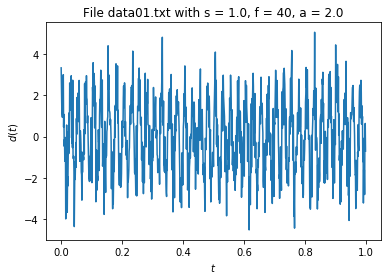

In [3]:
plotfunction('data01.txt', s=1.0, f=40, a=2.0)

s = 0.5,
d = 0.001,
N = 1000,
f = 40,
p = 0.0,
a = 2.0,
r = 0:

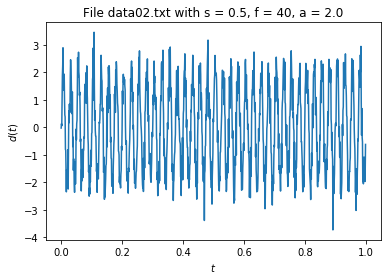

In [4]:
plotfunction('data02.txt', s=0.5, f=40, a=2.0)

s = 0.0,
d = 0.001,
N = 1000,
f = 40,
p = 0.0,
a = 2.0,
r = 0:

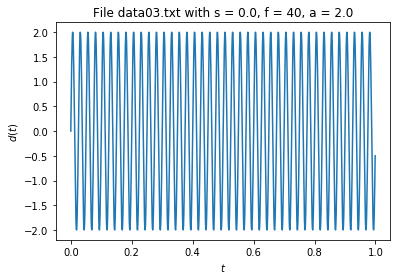

In [5]:
plotfunction('data03.txt', s=0.0, f=40, a=2.0)

### Different frequency

s = 1.0,
d = 0.001,
N = 1000,
f = 60,
p = 0.0,
a = 2.0,
r = 0:

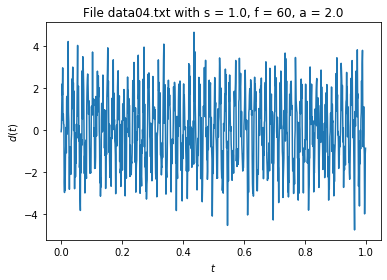

In [6]:
plotfunction('data04.txt', s=1.0, f=60, a=2.0)

### Different amplitudes

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 1.0, r = 0:

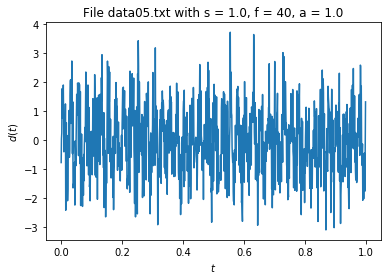

In [7]:
plotfunction('data05.txt', s=1.0, f=40, a=1.0)

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 0.5, r = 0:

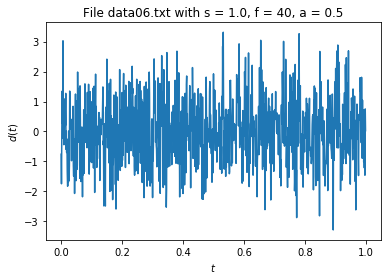

In [8]:
plotfunction('data06.txt', s=1.0, f=40, a=0.5)

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 0.3, r = 0:

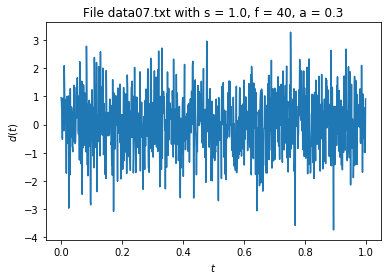

In [9]:
plotfunction('data07.txt', s=1.0, f=40, a=0.3)

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 0.1, r = 0:

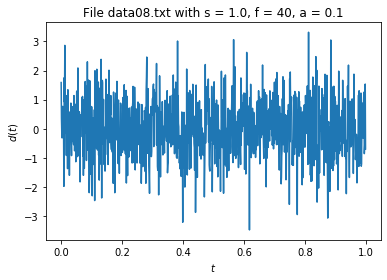

In [10]:
plotfunction('data08.txt', s=1.0, f=40, a=0.1)

## 2. Use the program prober

help for using the executable:

paths:

In [11]:
base_cmd = "wsl" # can be empty for local use
exe_dir = "/mnt/c/Users/janhe/datalab/code/" # directory where the executable is found
output_dir = "/mnt/c/Users/janhe/datalab/solutions/exercise1" # directory to save the data file
data_dir = "/mnt/c/Users/janhe/datalab/solutions/exercise1" # directory for jupyter to find the data in

A function calling the prober-executable:

In [12]:
def prober(i, m, f=0, p=0, o=None, t=None):
    if o == None:
        o = "results_" + str(uuid.uuid4()) + ".csv"
    
    #path of the executable:
    exe_path = os.path.join(exe_dir, 'prober')
    
    #command line: "{base_cmd} " taken out before "{exe_path}"
    cmd_str = f"{base_cmd} {exe_path} -i {output_dir}/{i} "\
        f"-o {output_dir}/{o} -m {m}"
    
    if t:
        cmd_str += f" -t {output_dir}/{t} "
    else:
        cmd_str += f" -f {f} -p {p}"
    
    # Optionally print the command line and test it outside the notebook
    #print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    if os.path.isfile(o):
        print(f"Output generated in file {o}")

    return os.path.join(data_dir, o)

In [13]:
prober("data01.txt", f=10, p=0, m=1)

The process has an output: 10 0 0.00989038



'/mnt/c/Users/janhe/datalab/solutions/exercise1\\results_db0ce969-127b-4c23-b205-6b28b5463bb2.csv'

In [14]:
prober("data01.txt", f=30, p=0, m=2)

The process has an output: 30 0 3.54137



'/mnt/c/Users/janhe/datalab/solutions/exercise1\\results_291b9d9c-89b5-4cef-8821-f9f3132e37de.csv'

## 3. Vary the parameters of an injected signal, probe the same parameter point

Use prober with a frequency of 40 and with method 1. Apply it to all files from task 1:

In [15]:
for i in range(1,9):
    prober(i=f"data0{i}.txt", f=40, p=0, m=1)

The process has an output: 40 0 1.00848

The process has an output: 40 0 1.02144

The process has an output: 40 0 1

The process has an output: 40 0 -0.0513306

The process has an output: 40 0 0.47805

The process has an output: 40 0 0.254806

The process has an output: 40 0 0.123101

The process has an output: 40 0 0.084002



Use prober with a frequency of 40 and with method 2:

In [16]:
for i in range(1,9):
    prober(i=f"data0{i}.txt", f=40, p=0, m=2)

The process has an output: 40 0 1.52679

The process has an output: 40 0 0.784745

The process has an output: 40 0 0.500001

The process has an output: 40 0 3.5699

The process has an output: 40 0 0.955579

The process has an output: 40 0 1.14785

The process has an output: 40 0 1.29477

The process has an output: 40 0 1.33483



Use prober with a frequency of 45 and with method 1:

In [17]:
for i in range(1,9):
    prober(i=f"data0{i}.txt", f=45, p=0, m=1)

The process has an output: 45 0 -0.00687267

The process has an output: 45 0 -0.0186726

The process has an output: 45 0 1.41438e-08

The process has an output: 45 0 0.00300158

The process has an output: 45 0 0.0239246

The process has an output: 45 0 -0.0113344

The process has an output: 45 0 -0.0084972

The process has an output: 45 0 -0.00388227



Use prober with a frequency of 45 and with method 2:

In [18]:
for i in range(1,9):
    prober(i=f"data0{i}.txt", f=45, p=0, m=2)

The process has an output: 45 0 3.5575

The process has an output: 45 0 2.86498

The process has an output: 45 0 2.5

The process has an output: 45 0 3.46124

The process has an output: 45 0 1.86383

The process has an output: 45 0 1.68013

The process has an output: 45 0 1.55796

The process has an output: 45 0 1.5106



Use method 3. Create template bank file "tb.dat" for this, where f=40 and p=0:

In [19]:
# Make a "template-bank" with a single template. 
with open('tb.dat','w') as tbfile:
     tbfile.write("40 0\n")

Write a function that finds the maximum of the results in the output file:

In [20]:
def analyze_m3(datafile):
    data = np.loadtxt(datafile)
    a = np.max(data[:,2])
    b = np.sum(data[:,2])
    print(f"max: {a}")
    print(f"sum: {b}")
    print(f"difference between max and sum: {b-a}")

Now use prober and find the maximum:

In [21]:
for i in range(1,9):
    new_file = f"analysisdata0{i}m3.csv"
    prober(i=f"data0{i}.txt", m=3, o=new_file, t="tb.dat")
    analyze_m3(new_file)

Output generated in file analysisdata01m3.csv
max: 1017310.0
sum: 1523123.9704000002
difference between max and sum: 505813.9704000002
Output generated in file analysisdata02m3.csv
max: 1043350.0
sum: 1163821.722823
difference between max and sum: 120471.72282300005
Output generated in file analysisdata03m3.csv
max: 1000000.0
sum: 1000000.0000000006
difference between max and sum: 5.820766091346741e-10
Output generated in file analysisdata04m3.csv
max: 972799.0
sum: 1486430.4420399996
difference between max and sum: 513631.44203999965
Output generated in file analysisdata05m3.csv
max: 228572.0
sum: 708613.325423
difference between max and sum: 480041.32542300003
Output generated in file analysisdata06m3.csv
max: 64942.6
sum: 580378.9004899999
difference between max and sum: 515436.30048999994
Output generated in file analysisdata07m3.csv
max: 15153.9
sum: 521851.41099000006
difference between max and sum: 506697.51099000004
Output generated in file analysisdata08m3.csv
max: 10239.2
sum

## 4. Plots of results

Create the template bank file 'task4_f.txt' with a wide range of frequencies.

In [22]:
num_f = 500
f_list = np.linspace(0.2,100.0,num_f)
tbank = 'task4_f.txt'

with open(tbank,'w') as file:
    for f in f_list:
        file.write("{0} {1}\n".format(f,0))

Analyze the data with all these frequencies and with method 1:

In [23]:
for i in range(1,9):
    prober(i=f"data0{i}.txt", m=1, o=f"task4data0{i}m1.csv", t=tbank)

Output generated in file task4data01m1.csv
Output generated in file task4data02m1.csv
Output generated in file task4data03m1.csv
Output generated in file task4data04m1.csv
Output generated in file task4data05m1.csv
Output generated in file task4data06m1.csv
Output generated in file task4data07m1.csv
Output generated in file task4data08m1.csv


Analyze the data with all these frequencies and with method 2:

In [24]:
for i in range(1,9):
    prober(i=f"data0{i}.txt", m=2, o=f"task4data0{i}m2.csv", t=tbank)

Output generated in file task4data01m2.csv
Output generated in file task4data02m2.csv
Output generated in file task4data03m2.csv
Output generated in file task4data04m2.csv
Output generated in file task4data05m2.csv
Output generated in file task4data06m2.csv
Output generated in file task4data07m2.csv
Output generated in file task4data08m2.csv


A function for plots of the resulting files:

In [25]:
def newplotfunction(datafile, m):
    results = np.loadtxt(datafile)
    #X, Y = np.loadtxt(datafile, delimiter=' ', unpack=True)
    plt.plot(results[:,0],results[:,2])
    plt.title(f'File {datafile}')
    plt.xlabel('$f$')
    #plt.ylabel('$d(t)$')
    plt.show()
    # S_2 searching for a minimum:
    if m == 2:
        best = np.where(results[:,2] == np.min(results[:,2]))
        print("Minimum at f = {0:.3f}".format(results[:,0][best][0]))
    else:
        best = np.where(results[:,2] == np.max(results[:,2]))
        print("Maximum at f = {0:.3f}".format(results[:,0][best][0]))
    print("It is {0:.3f}".format(results[:,2][best][0]))

Now plot some of the results:

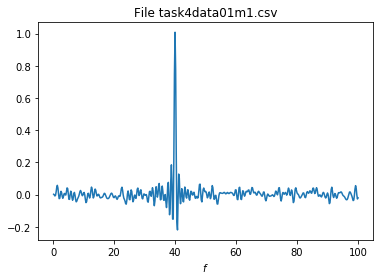

Maximum at f = 40.000
It is 1.008


In [26]:
newplotfunction("task4data01m1.csv",1)

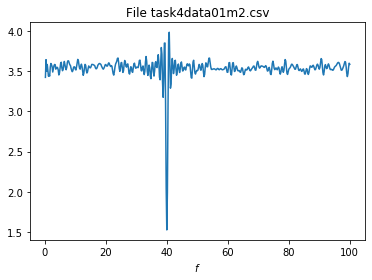

Minimum at f = 40.000
It is 1.527


In [27]:
newplotfunction("task4data01m2.csv",2)

Now test this for weaker signals, i.e. smaller amplitudes:

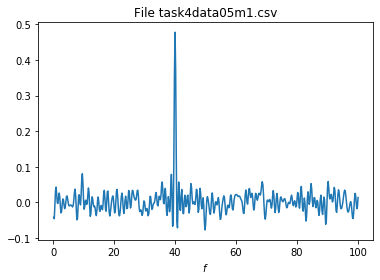

Maximum at f = 40.000
It is 0.478


In [28]:
newplotfunction("task4data05m1.csv",1)

The same with method 2:

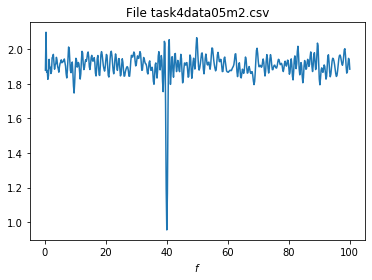

Minimum at f = 40.000
It is 0.956


In [29]:
newplotfunction("task4data05m2.csv",2)

Weaker signals:

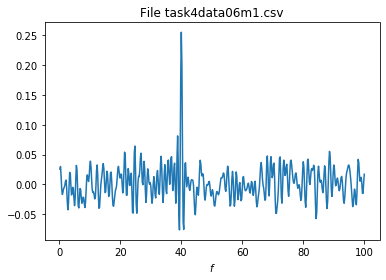

Maximum at f = 40.000
It is 0.255


In [30]:
newplotfunction("task4data06m1.csv",1)

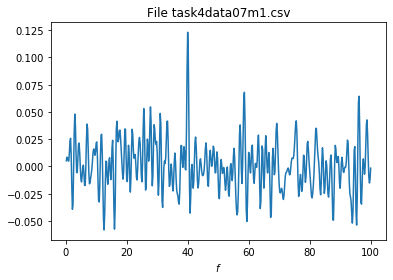

Maximum at f = 40.000
It is 0.123


In [31]:
newplotfunction("task4data07m1.csv",1)

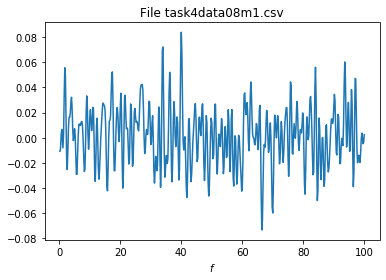

Maximum at f = 40.000
It is 0.084


In [32]:
newplotfunction("task4data08m1.csv",1)

Plot the files arising from using method 3:

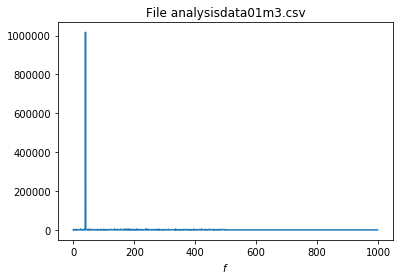

Maximum at f = 40.000
It is 1017310.000


In [33]:
newplotfunction("analysisdata01m3.csv",3)

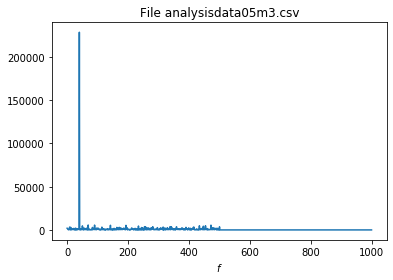

Maximum at f = 40.000
It is 228572.000


In [34]:
newplotfunction("analysisdata05m3.csv",3)

When the amplitude gets smaller, the peak is less high.

## 5. Strategy

In [35]:
#use f_list from above for the frequencies
num_p = 200
p_list = np.linspace(0,1.99*np.pi,num_p)

Create a file with all combinations of the values for the frequency and the phase:

In [36]:
tb_new = 'task5.txt'
with open(tb_new,'w') as file:
    for p in p_list:
        for f in f_list:
            file.write("{0} {1}\n".format(f,p))

Write a function that finds frequency, phase and amplitude of the signal. Make a contour plot.

In [37]:
def task5function(i,outfile):
    prober(i, m=1, o=outfile, t=tb_new)
    results = np.loadtxt(outfile)
    values = results[:,2]
    # Find the maximum:
    best = np.where(values == np.max(values))
    freq = results[:,0][best][0]
    phase = results[:,1][best][0]
    print("Maximum at f = {0:.3f}".format(freq))
    print("and at p = {0:.3f}".format(phase))
    print("It is {0:.3f}".format(values[best][0]))
    # For the amplitude, multiply the maximum by 2:
    print("Amplitude: {0:.3f}".format(2*values[best][0]))
    # Convert the 1D array to a 2D array:
    arr2d = np.reshape(values, (num_p, num_f))
    # Contour plot:
    plt.contourf(f_list,p_list,arr2d)
    plt.colorbar()
    plt.scatter(40,0,marker="x", label="True signal")
    plt.scatter(freq,phase,marker="o", label="Matched frequency")

Another template bank file with a smaller range of frequencies:

In [38]:
num_f_smaller = 51
f_list_smaller = np.linspace(35,45,num_f_smaller)
print(f_list_smaller)

[35.  35.2 35.4 35.6 35.8 36.  36.2 36.4 36.6 36.8 37.  37.2 37.4 37.6
 37.8 38.  38.2 38.4 38.6 38.8 39.  39.2 39.4 39.6 39.8 40.  40.2 40.4
 40.6 40.8 41.  41.2 41.4 41.6 41.8 42.  42.2 42.4 42.6 42.8 43.  43.2
 43.4 43.6 43.8 44.  44.2 44.4 44.6 44.8 45. ]


In [39]:
tb_new_less = 'task5less.txt'
with open(tb_new_less,'w') as file:
    for p in p_list:
        for f in f_list_smaller:
            file.write("{0} {1}\n".format(f,p))

In [40]:
def task5new(i,outfile):
    prober(i, m=1, o=outfile, t=tb_new_less)
    results = np.loadtxt(outfile)
    values = results[:,2]
    # Find the maximum:
    best = np.where(values == np.max(values))
    freq = results[:,0][best][0]
    phase = results[:,1][best][0]
    print("Maximum at f = {0:.3f}".format(freq))
    print("and at p = {0:.3f}".format(phase))
    print("It is {0:.3f}".format(values[best][0]))
    # For the amplitude, multiply the maximum by 2:
    print("Amplitude: {0:.3f}".format(2*values[best][0]))
    # Convert the 1D array to a 2D array:
    arr2d = np.reshape(values, (num_p, num_f_smaller))
    # Contour plot:
    plt.contourf(f_list_smaller,p_list,arr2d)
    plt.colorbar()
    plt.scatter(40,0,marker="x", label="True signal")
    plt.scatter(freq,phase,marker="o", label="Matched frequency")

Test the functions on the data:

First, analyze the data which was created with an amplitude of 2, a frequency of 40, and a phase of 0:

Output generated in file task5data01m1.csv
Maximum at f = 40.000
and at p = 0.031
It is 1.008
Amplitude: 2.017


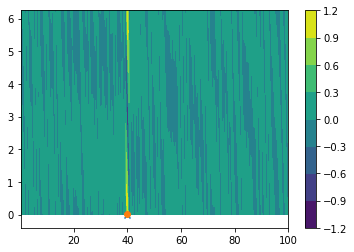

In [41]:
task5function(i="data01.txt", outfile="task5data01m1.csv")

Output generated in file task5data01less.csv
Maximum at f = 40.000
and at p = 0.031
It is 1.008
Amplitude: 2.017


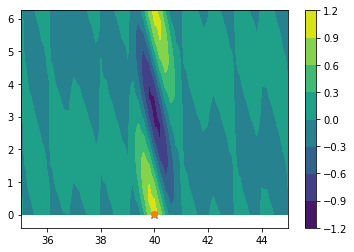

In [42]:
task5new(i="data01.txt", outfile="task5data01less.csv")

Signal with a=1:

Output generated in file task5data05m1.csv
Maximum at f = 40.000
and at p = 0.000
It is 0.478
Amplitude: 0.956


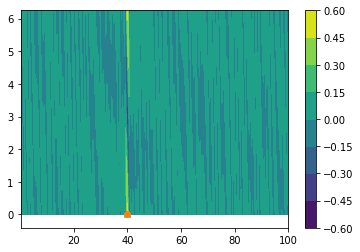

In [43]:
task5function(i="data05.txt", outfile="task5data05m1.csv")

Output generated in file task5data05less.csv
Maximum at f = 40.000
and at p = 0.000
It is 0.478
Amplitude: 0.956


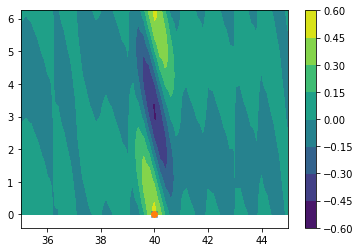

In [44]:
task5new(i="data05.txt", outfile="task5data05less.csv")

Signal with a=0.3:

Output generated in file task5data07m1.csv
Maximum at f = 40.200
and at p = 5.686
It is 0.126
Amplitude: 0.251


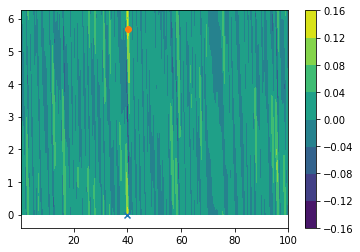

In [45]:
task5function(i="data07.txt", outfile="task5data07m1.csv")

Output generated in file task5data07less.csv
Maximum at f = 40.200
and at p = 5.686
It is 0.126
Amplitude: 0.251


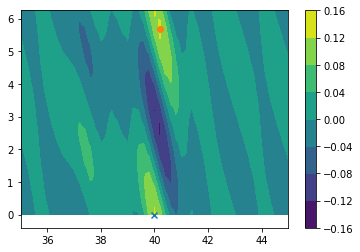

In [46]:
task5new(i="data07.txt", outfile="task5data07less.csv")